In [1]:
from __future__ import division, print_function
import os
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from disparity import CNN

## Load image data

In [2]:
# load left and right images
img_L = np.array(Image.open('../data/test/moto_L.png'))
img_R = np.array(Image.open('../data/test/moto_R.png'))

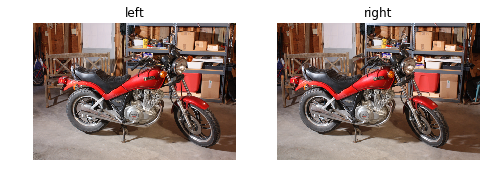

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(img_L)
axes[0].set_title('left')
axes[0].axis('off')
axes[1].imshow(img_R)
axes[1].set_title('right')
axes[1].axis('off')
plt.show()

## Get VGG features

In [4]:
feats_L, feats_R = CNN.cnn_features(np.stack([img_L, img_R], axis=0))

In [5]:
print(feats_L.shape)
print(feats_R.shape)

(200, 296, 128)
(200, 296, 128)


In [6]:
def viz_feats(features):
    vmax = features.mean() + 2*features.std()
    fig, axes = plt.subplots(16,4,figsize=(10,30))
    for i in range(16):
        for j in range(4):
            ix = i*4 + j
            axes[i,j].imshow(
                features[:,:,ix], cmap='gray', 
                vmin=0, vmax=vmax
            )
            axes[i,j].axis('off')
    plt.show()

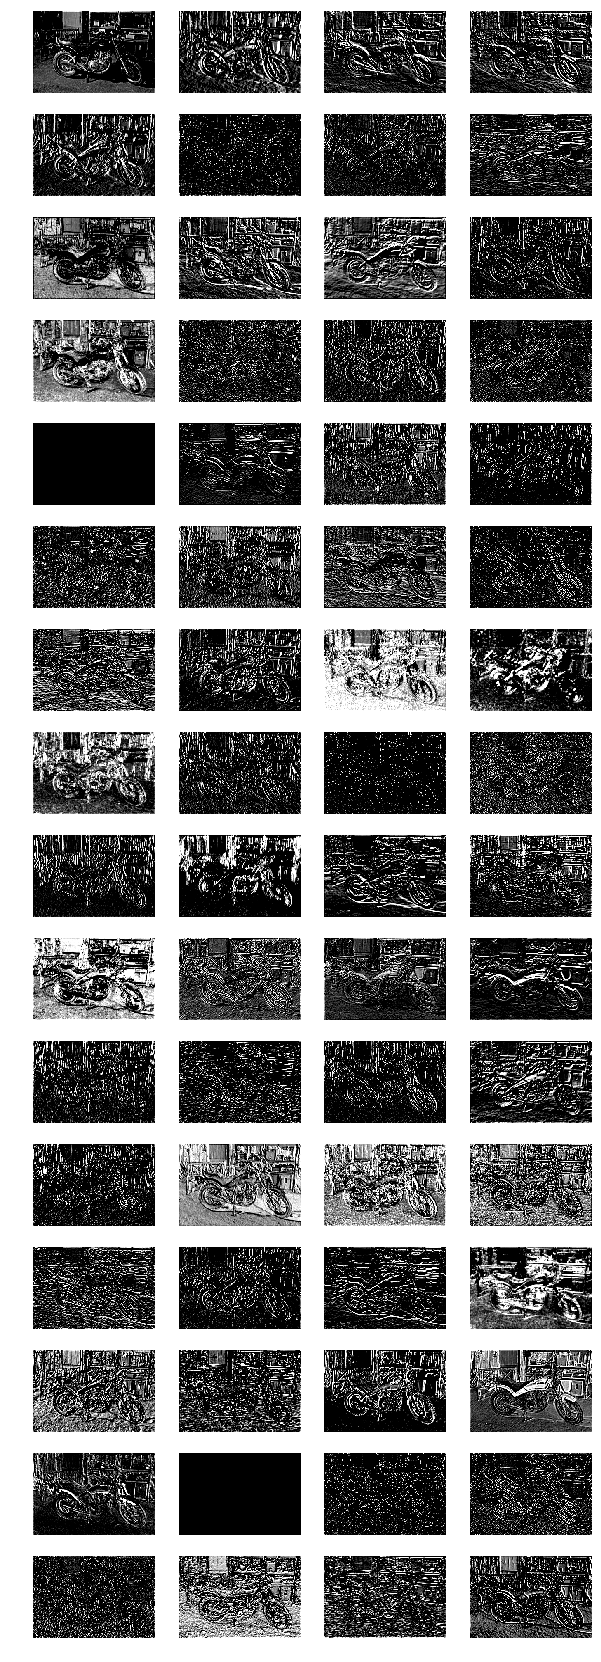

In [7]:
viz_feats(feats_L)

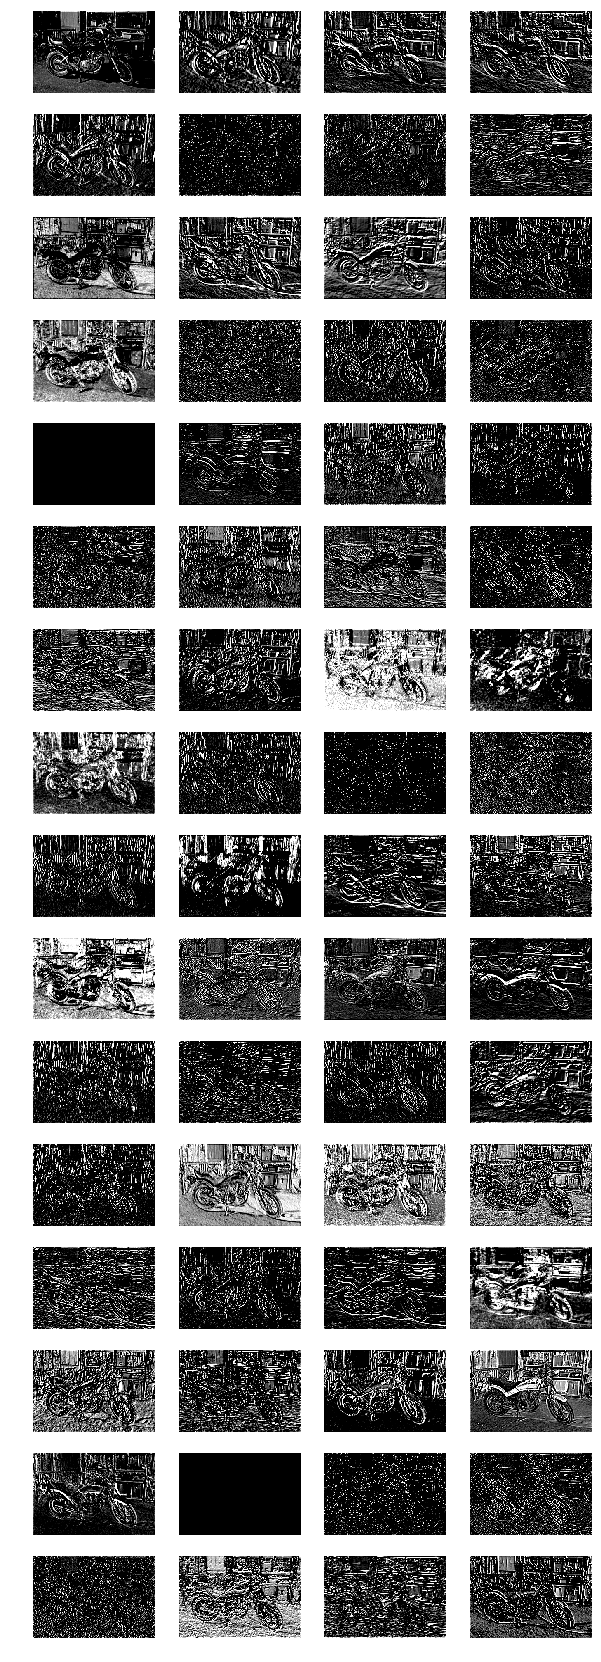

In [8]:
viz_feats(feats_R)